# Liver Disease Prediction

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
# from xgboost import XGBClassifier
# from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df=pd.read_csv('indian_liver_patient.csv')

In [5]:
df.shape

(583, 11)

In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [8]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

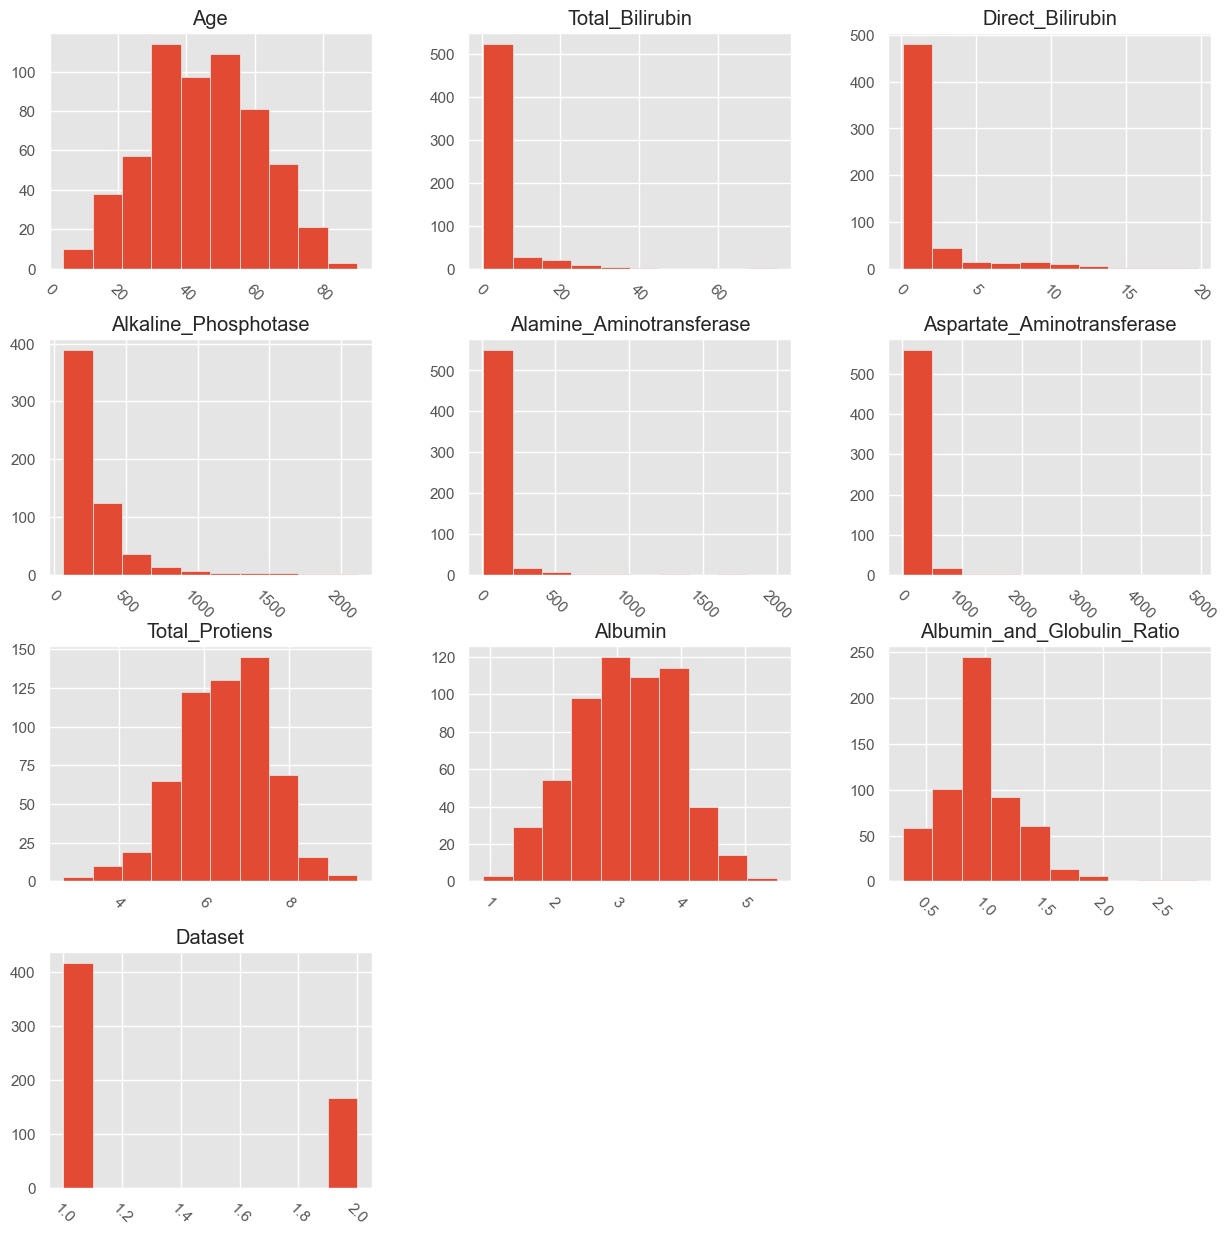

In [9]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [11]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [12]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

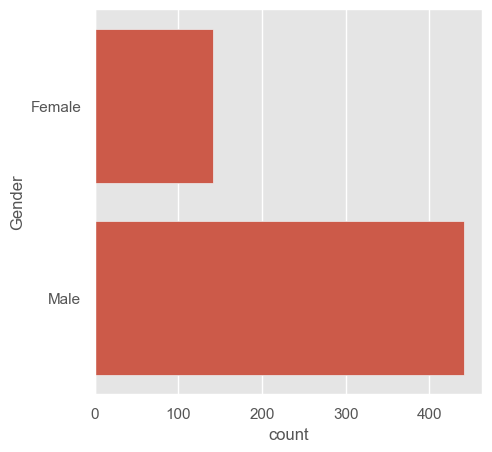

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [14]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


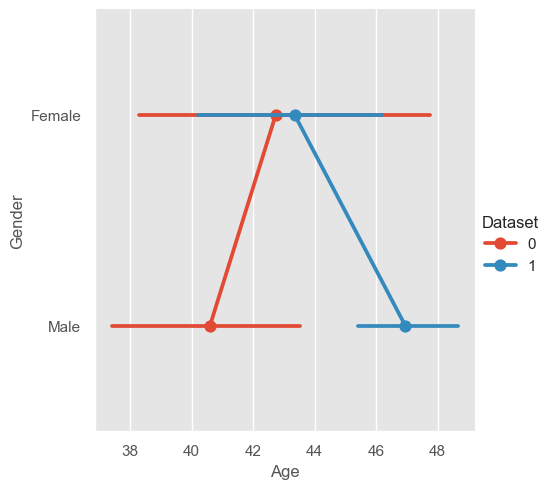

In [15]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="point")

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


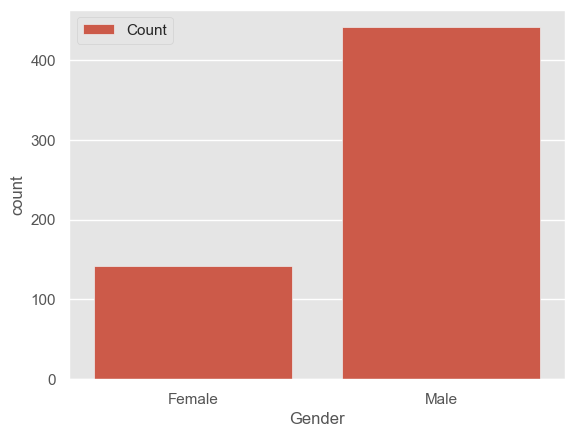

In [16]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [17]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

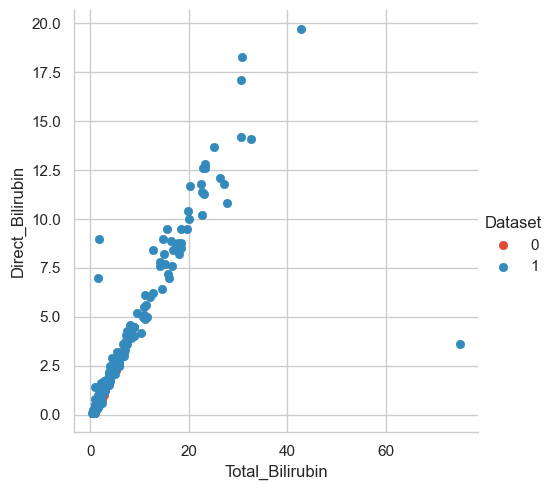

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

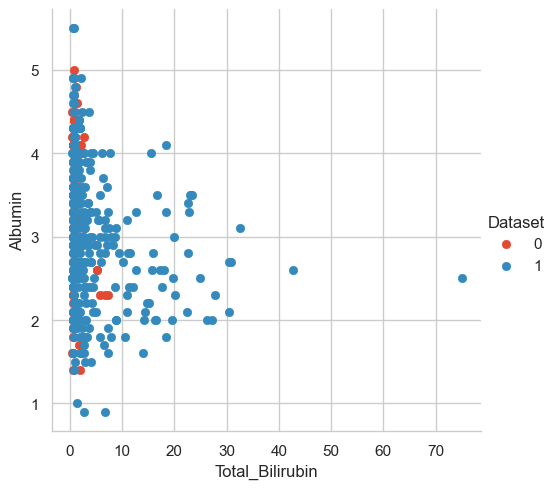

In [19]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

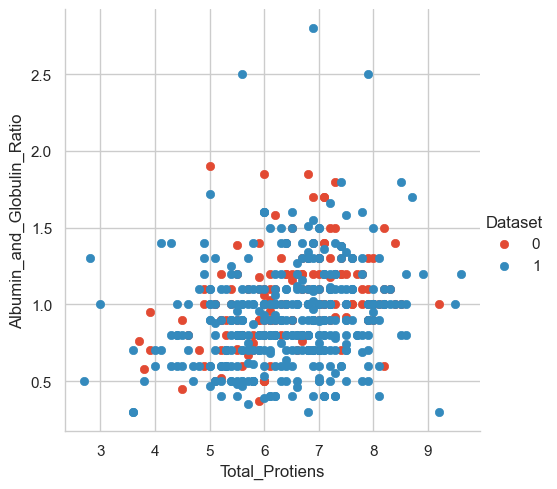

In [20]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

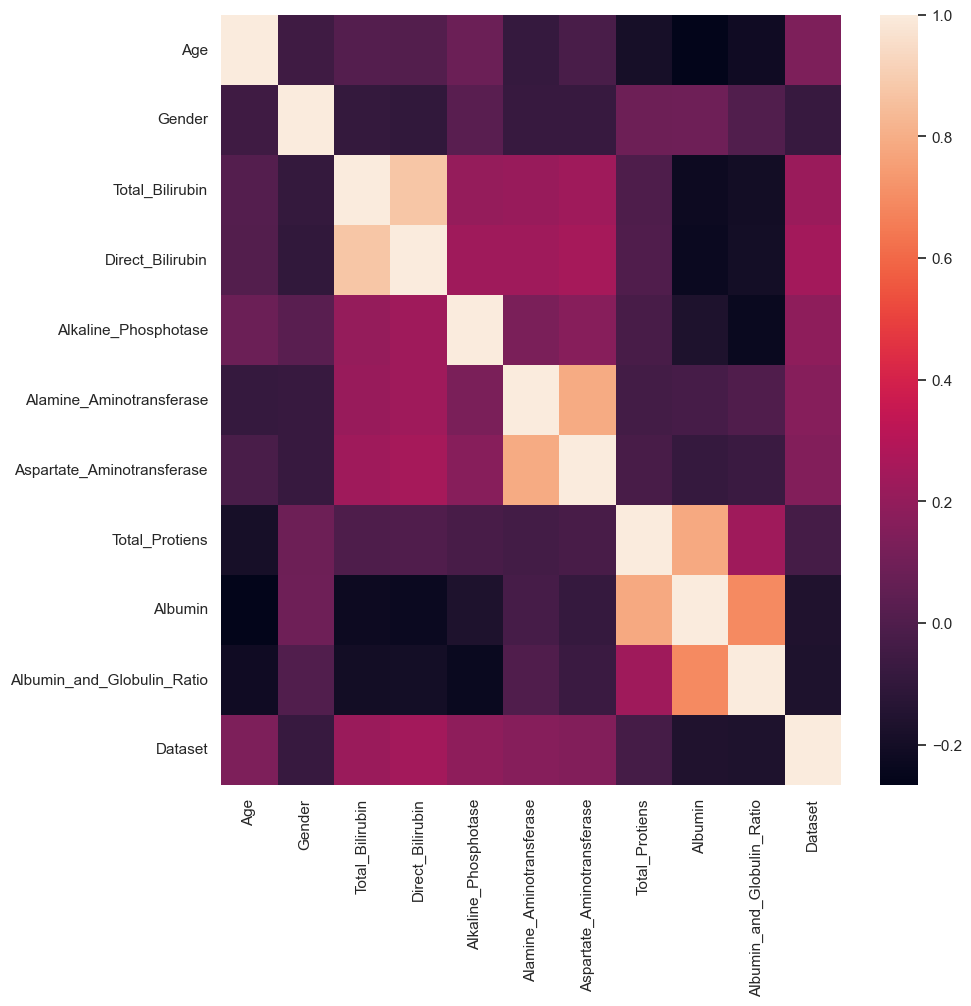

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

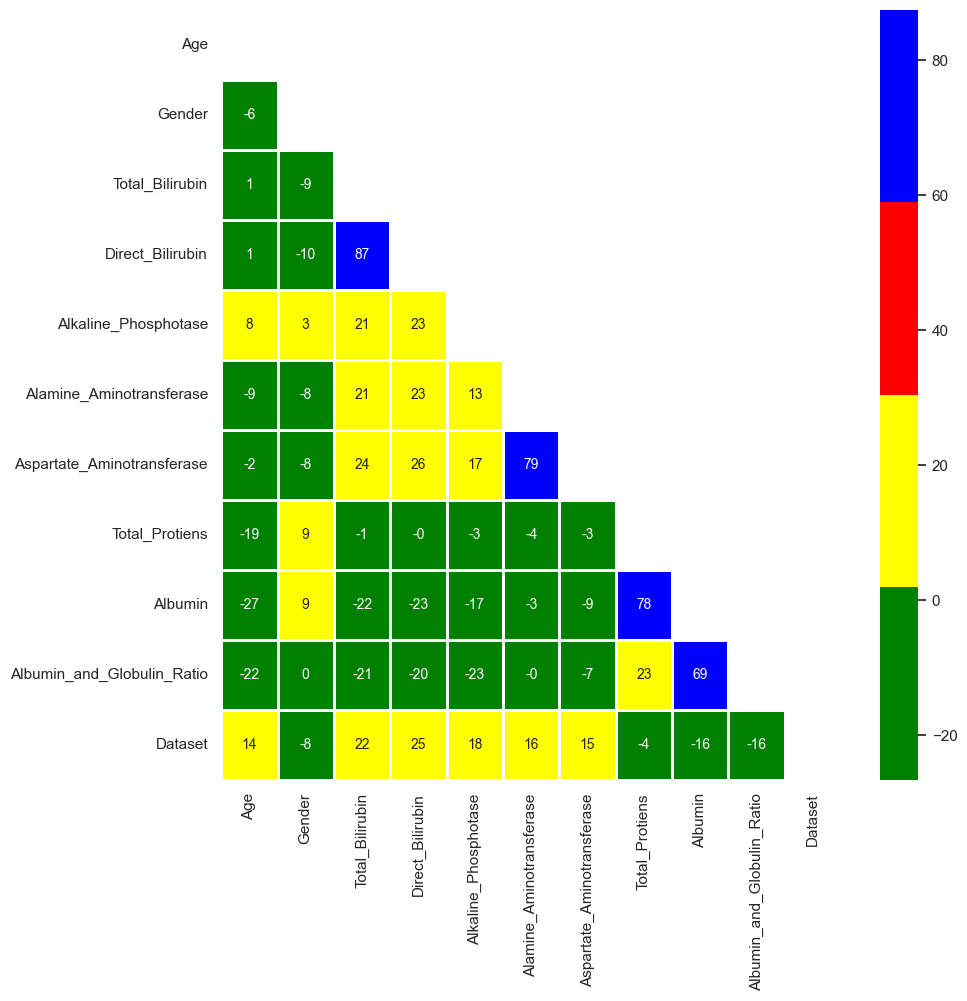

In [23]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [24]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

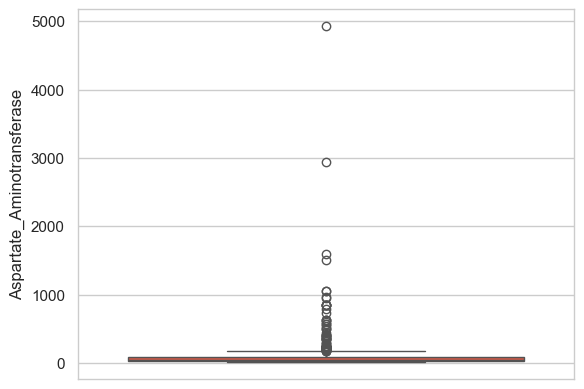

In [25]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [26]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [27]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

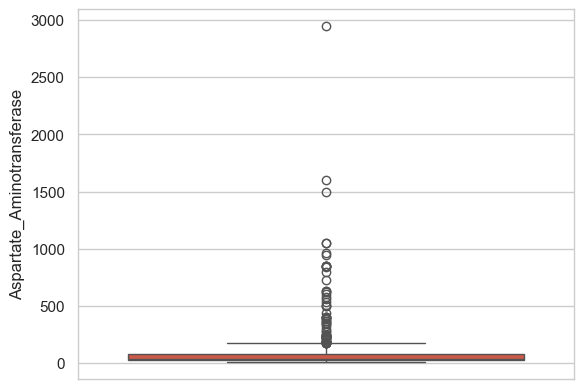

In [28]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [29]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [30]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [31]:
df.isnull().values.any()

True

In [32]:
df=df.dropna(how='any')  

In [33]:
df.shape

(564, 11)

In [34]:
columns = df.columns

In [35]:
columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [36]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [89]:
df['Dataset'].value_counts()

1    402
0    162
Name: Dataset, dtype: int64

## Machine Learning Models

### Data Preparation

In [37]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [91]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [150]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 564, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix and 'y' is your target variable
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print(y_resampled.value_counts())

1    402
0    402
Name: Dataset, dtype: int64


In [94]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    )

In [95]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(562, 10) (242, 10) (562,) (242,)


### Data standardization

In [96]:
train_mean = X_train.mean()
train_std = X_train.std()

In [97]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [98]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02
mean,-1.675212e-16,4.425088e-17,-6.321555e-18,4.425088e-17,3.002738e-17,-1.264311e-17,3.160777e-17,-7.016926e-16,6.953710e-17,9.719390e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.283180e+00,-5.012211e-01,-3.809638e-01,-4.222393e-01,-7.983788e-01,-3.683782e-01,-4.506260e-01,-3.669948e+00,-3.008932e+00,-2.194891e+00
25%,-7.393030e-01,-5.012211e-01,-3.277160e-01,-3.809536e-01,-4.405022e-01,-2.883749e-01,-3.643602e-01,-6.577639e-01,-6.289400e-01,-5.273907e-01
50%,6.351325e-02,-5.012211e-01,-3.097995e-01,-3.448754e-01,-3.212100e-01,-2.283724e-01,-2.811753e-01,9.814542e-02,-2.961952e-02,8.972984e-03
75%,7.891357e-01,-5.012211e-01,-1.318888e-01,-1.332397e-01,4.992128e-02,-8.836665e-02,-1.055627e-01,6.422846e-01,7.666492e-01,4.731096e-01
max,2.842493e+00,1.991578e+00,1.287339e+01,7.669750e+00,8.126445e+00,1.076542e+01,9.346706e+00,2.633534e+00,3.087437e+00,6.142612e+00


In [99]:
train_mean

Age                            43.971530
Gender                          0.201068
Total_Bilirubin                 2.641320
Direct_Bilirubin                1.122726
Alkaline_Phosphotase          270.701068
Alamine_Aminotransferase       65.254448
Aspartate_Aminotransferase     83.131673
Total_Protiens                  6.484362
Albumin                         3.170382
Albumin_and_Globulin_Ratio      0.958138
dtype: float64

In [100]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [101]:
train_std

Age                            16.192995
Gender                          0.401156
Total_Bilirubin                 5.620796
Direct_Bilirubin                2.422149
Alkaline_Phosphotase          226.335001
Alamine_Aminotransferase      149.993788
Aspartate_Aminotransferase    162.289075
Total_Protiens                  1.031176
Albumin                         0.754548
Albumin_and_Globulin_Ratio      0.299850
dtype: float64

In [102]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,-0.028609,0.013820,0.001589,0.040824,-0.034335,-0.068118,-0.093748,0.102582,0.161126,0.134950
std,0.999059,1.011362,0.842650,1.021741,0.790424,0.511767,0.649836,0.992476,0.980060,0.908627
min,-2.468446,-0.501221,-0.398755,-0.422239,-0.917671,-0.368378,-0.450626,-3.572971,-2.346283,-2.194891
25%,-0.739303,-0.501221,-0.327591,-0.380954,-0.453757,-0.288375,-0.370522,-0.566695,-0.490867,-0.527391
50%,-0.121752,-0.501221,-0.309192,-0.339668,-0.303537,-0.225039,-0.284256,0.186593,0.098197,0.139610
75%,0.742819,-0.501221,-0.160548,-0.133240,0.076431,-0.081700,-0.100941,0.790978,0.966961,0.798912
max,2.471962,1.991578,4.956358,5.399039,5.652236,4.758501,4.725323,3.021441,2.292258,2.807610


# LR

In [103]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
import pickle

In [104]:
filename = 'logistic.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [105]:
# model predictions

y_pred = lr.predict(X_test)

In [106]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7241992882562278
0.7148760330578512


In [107]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[102  19]
 [ 50  71]]


In [108]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       121
           1       0.79      0.59      0.67       121

    accuracy                           0.71       242
   macro avg       0.73      0.71      0.71       242
weighted avg       0.73      0.71      0.71       242



# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
# model predictions 

y_pred = knn.predict(X_test)

In [111]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.7864768683274022
0.6611570247933884


In [112]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[99 22]
 [60 61]]


In [113]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       121
           1       0.73      0.50      0.60       121

    accuracy                           0.66       242
   macro avg       0.68      0.66      0.65       242
weighted avg       0.68      0.66      0.65       242



# SVM

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [115]:
# best parameters

grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [116]:
# best score 

grid_search.best_score_

0.726027180783818

In [117]:
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
452,0.310534,1.991578,-0.363173,-0.422239,-0.378647,-0.321710,-0.352036,0.112141,-0.358337,-0.860891
397,1.607391,-0.501221,-0.363173,-0.422239,2.612494,0.071640,0.596888,-0.178789,-0.623396,-0.694141
35,0.248779,-0.501221,-0.220844,-0.215811,-0.034025,-0.181704,-0.105563,-0.663672,-1.286045,-1.161041
81,-1.912650,-0.501221,-0.363173,-0.422239,0.217814,-0.248373,-0.167181,0.694001,0.569371,0.139610
159,0.681064,-0.501221,2.038622,2.674185,2.117653,-0.201705,-0.124048,-1.439485,-2.081224,-1.627941
...,...,...,...,...,...,...,...,...,...,...
763,0.495799,-0.501221,0.103218,0.130636,1.260516,-0.288375,-0.271932,-0.482911,-1.680470,-1.630089
192,-0.245262,-0.501221,0.223933,0.238331,0.350361,5.898548,8.730522,0.209118,0.834431,1.140110
629,-0.554038,-0.501221,-0.257025,-0.299076,0.381288,0.624996,0.036160,1.757484,1.622925,0.467503
559,0.989840,-0.501221,-0.380964,-0.422239,1.013095,-0.301709,-0.302742,-0.566695,-2.081224,-1.961441


In [125]:
svc = SVC(C = 10, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True)

In [126]:
# model predictions 

y_pred = svc.predict(X_test)

In [127]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.791814946619217
0.7024793388429752


In [66]:
import pickle

In [128]:
filename = 'svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [129]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[107  14]
 [ 58  63]]


In [130]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       121
           1       0.82      0.52      0.64       121

    accuracy                           0.70       242
   macro avg       0.73      0.70      0.69       242
weighted avg       0.73      0.70      0.69       242



# DT

In [131]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.7231404958677686 

Confusion Matrix :- 
[[96 25]
 [42 79]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.76      0.65      0.70       121

    accuracy                           0.72       242
   macro avg       0.73      0.72      0.72       242
weighted avg       0.73      0.72      0.72       242



In [132]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [134]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
0.7356582125603865


In [135]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8736654804270463
Test Accuracy of Decision Tree Classifier is 0.6859504132231405 

Confusion Matrix :- 
[[100  21]
 [ 55  66]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.65      0.83      0.72       121
           1       0.76      0.55      0.63       121

    accuracy                           0.69       242
   macro avg       0.70      0.69      0.68       242
weighted avg       0.70      0.69      0.68       242



# RF

In [136]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
y_pred = rand_clf.predict(X_test)

In [138]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

1.0
0.7975206611570248


In [139]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[110  11]
 [ 38  83]]


In [140]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       121
           1       0.88      0.69      0.77       121

    accuracy                           0.80       242
   macro avg       0.81      0.80      0.79       242
weighted avg       0.81      0.80      0.79       242



In [149]:
filename = 'rf.pkl'
pickle.dump(rand_clf, open(filename, 'wb'))

# Naive Bayes

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [142]:
y_pred = nb.predict(X_test)

In [143]:
# accuracy score

print(accuracy_score(y_train, nb.predict(X_train)))

nb_acc = accuracy_score(y_test, y_pred)
print(nb_acc)

0.693950177935943
0.6983471074380165


In [144]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[117   4]
 [ 69  52]]


In [145]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       121
           1       0.93      0.43      0.59       121

    accuracy                           0.70       242
   macro avg       0.78      0.70      0.67       242
weighted avg       0.78      0.70      0.67       242



# Model Comparison

In [146]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Naive bayes'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(nb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,79.75
0,Logistic Regression,71.49
2,SVM,70.25
5,Naive bayes,69.83
3,Decision Tree Classifier,68.60
1,KNN,66.12


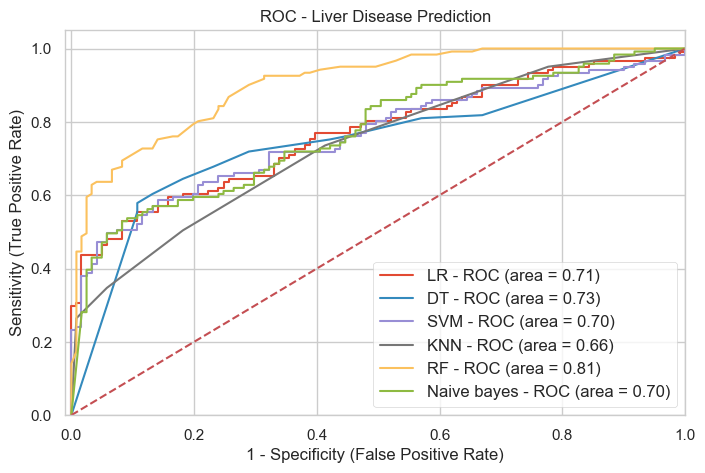

In [147]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'Naive bayes',
    'model': nb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
# plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[71.49, 68.60000000000001, 70.25, 66.12, 79.75, 69.83]
[71.49, 71.89999999999999, 70.25, 66.12, 78.10000000000001, 69.83]


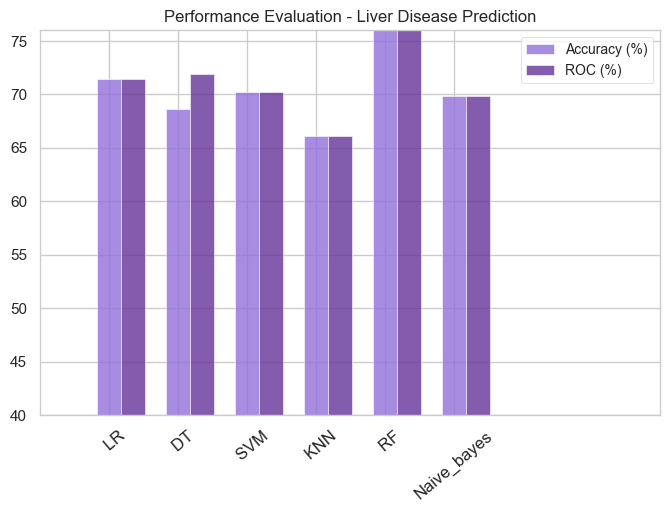

In [148]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'Naive bayes',
    'model': nb,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(nb_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 6
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN',  '   RF', 'Naive_bayes'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
# plt.savefig("outputs/PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()